In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
import os
os.chdir('./')

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/nhyha/git-study/master/datasets/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/nhyha/git-study/master/datasets/test.csv')
submission=pd.read_csv('https://raw.githubusercontent.com/nhyha/git-study/master/datasets/sample_submission.csv')

In [5]:
train.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size,credit
0,0,1,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,1,0,NaN,2,1
1,1,1,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,1,Laborers,3,1
2,2,0,1,1,450000.0,Working,Higher education,Married,House / apartment,1,0,Managers,2,2
3,3,1,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,Sales staff,2,0
4,4,1,1,1,157500.0,State servant,Higher education,Married,House / apartment,1,0,Managers,2,2


In [6]:
test.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size
0,22001,1,0,1,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,1,0,NaN,2
1,22002,1,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,NaN,2
2,22003,0,1,1,225000.0,Pensioner,Higher education,Separated,House / apartment,1,0,NaN,1
3,22004,0,1,1,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,1,Drivers,2
4,22005,1,0,0,202500.0,Working,Higher education,Married,Municipal apartment,1,0,NaN,3


In [7]:
train.shape

(22001, 14)

In [8]:
test.shape

(4456, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22001 entries, 0 to 22000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           22001 non-null  int64  
 1   gender          22001 non-null  int64  
 2   is_car          22001 non-null  int64  
 3   is_reality      22001 non-null  int64  
 4   income_year     22001 non-null  float64
 5   income_type     22001 non-null  object 
 6   edu_type        22001 non-null  object 
 7   marital status  22001 non-null  object 
 8   house_type      22001 non-null  object 
 9   is_mobile       22001 non-null  int64  
 10  is_email        22001 non-null  int64  
 11  job_type        15223 non-null  object 
 12  family_size     22001 non-null  int64  
 13  credit          22001 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.4+ MB


#  **1. 데이터 전처리**

### 1) 결측치 제거

In [10]:
train.isnull().sum()

index                0
gender               0
is_car               0
is_reality           0
income_year          0
income_type          0
edu_type             0
marital status       0
house_type           0
is_mobile            0
is_email             0
job_type          6778
family_size          0
credit               0
dtype: int64

In [11]:
# train=train.drop('job_type', axis=1)       # 유일하게 결측치가 존재하는 job_type drop
# test=test.drop('job_type', axis=1)          # train과 test 데이터셋에서 결측치 제거

In [12]:
# 결측치를 None으로 대체
train = train.fillna('None')

# 결측치를 None으로 대체
test = test.fillna('None')


In [13]:
train.drop(['index', 'is_mobile'], axis=1, inplace=True)
test.drop(['index', 'is_mobile'], axis=1, inplace=True)

In [14]:
train .apply (lambda x : len(x.unique( ) ) )     # train과 test의 요소들의 개수를 파악

gender              2
is_car              2
is_reality          2
income_year       247
income_type         5
edu_type            5
marital status      5
house_type          6
is_email            2
job_type           19
family_size         9
credit              3
dtype: int64

In [15]:
test .apply (lambda x : len(x.unique( ) ) )

gender              2
is_car              2
is_reality          2
income_year       159
income_type         5
edu_type            5
marital status      5
house_type          6
is_email            2
job_type           19
family_size         9
dtype: int64

### 2)  연속형 변수에 대한 전처리 진행

In [16]:
train = train[(train['family_size'] <= 7)]
train = train.reset_index(drop=True)

for df in [train,test]:
    #income_mean: 소득/ 가족 수
  df['income_mean'] = df['income_year'] / df['family_size']

(2.632, 9.43]     2658
(9.43, 16.16]     8545
(16.16, 22.89]    6107
(22.89, 29.62]    2309
(29.62, 36.35]    1414
(36.35, 43.08]     383
(43.08, 49.81]     298
(49.81, 56.54]      96
(56.54, 63.27]      48
(63.27, 70.0]      140
Name: income_year, dtype: int64


<AxesSubplot:ylabel='Frequency'>

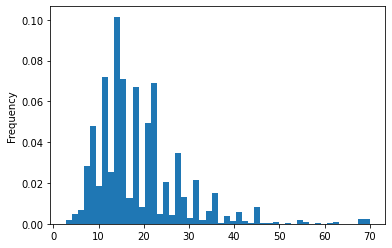

In [17]:
train['income_year'] = (train['income_year']/10000).astype(object)

# 70이상의 값이 매우 적게 존재하는 것을 확인, 이상치 처리
train . loc [train['income_year'] > 70]                             # 50가 넘는 값을 가진 모든 row를 호출
train . loc [train['income_year'] > 70 , 'income_year' ]           # 해당 row에서 50 이상인 요소 컬럼만을 호출
train . loc [train['income_year'] > 70 , 'income_year' ]   = 70      # 50 값으로 바꾸었어


print(train['income_year'].value_counts(bins=10,sort=False))
train['income_year'].plot(kind='hist',bins=50,density=True)

(6667.559, 96804.0]     13396
(96804.0, 186048.0]      6424
(186048.0, 275292.0]     1578
(275292.0, 364536.0]      401
(364536.0, 453780.0]      131
(453780.0, 543024.0]       26
(543024.0, 632268.0]       15
(632268.0, 721512.0]       18
(721512.0, 810756.0]        8
(810756.0, 900000.0]        1
Name: income_mean, dtype: int64


<AxesSubplot:ylabel='Frequency'>

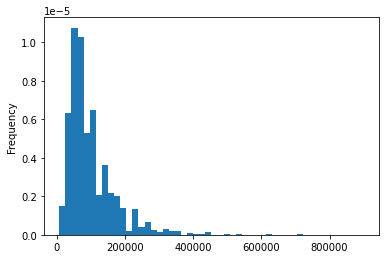

In [18]:
print(train['income_mean'].value_counts(bins=10,sort=False))
train['income_mean'].plot(kind='hist',bins=50,density=True)

In [19]:
test['income_year'] = (test['income_year']/10000).astype(object)

In [20]:
print(train [ 'income_year' ] .min( ))
print(train ['income_year'] .max())
print(len (train ['income_year'] .unique ( )))           # 최소 2.7부터 70까지, 236개의 요소로 이루어짐을 알수있다

2.7
70
236


In [21]:
print(train['family_size'].unique())

[2 3 4 1 5 6 7]


In [22]:
counts, bin_dividers  =  np.histogram (train['income_year'] , bins=7 )         # 구간 나눠준 값을 counts, bin_dividers 에 저장

train['income_year'] = pd.factorize(pd.cut(train ['income_year'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]
test['income_year'] = pd.factorize(pd.cut(test['income_year'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]

# counts, bin_dividers  =  np.histogram (train['income_mean'] , bins=7 )         # 구간 나눠준 값을 counts, bin_dividers 에 저장

# train['income_mean'] = pd.factorize(pd.cut(train ['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]
# test['income_mean'] = pd.factorize(pd.cut(test['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]

In [23]:
counts, bin_dividers  =  np.histogram (train['income_mean'] , bins=7 )         # 구간 나눠준 값을 counts, bin_dividers 에 저장

train['income_mean'] = pd.factorize(pd.cut(train ['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]
test['income_mean'] = pd.factorize(pd.cut(test['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]

# counts, bin_dividers  =  np.histogram (train['income_mean'] , bins=7 )         # 구간 나눠준 값을 counts, bin_dividers 에 저장

# train['income_mean'] = pd.factorize(pd.cut(train ['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]
# test['income_mean'] = pd.factorize(pd.cut(test['income_mean'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]

In [24]:
for df in [train,test]:
  
  df['c_h'] = (
  df['is_car'].astype(str) + '_' + df['is_reality'].astype(str))

  df['ID'] = (
  df['gender'].astype(str) + '_' + df['is_car'].astype(str) + '_' +\
  df['is_reality'].astype(str) + '_' + df['income_year'].astype(str) + '_' +\
  df['income_type'].astype(str) + '_' + df['edu_type'].astype(str) + '_' +\
  df['marital status'].astype(str) + '_' + df['house_type'].astype(str) + '_' +\
  df['is_email'].astype(str) + '_'+ df['job_type'].astype(str) + '_' +\
  df['family_size'].astype(str))

In [25]:
test               # test도 income_year가 인수형 변수로 구분됨을 확인가능

,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_email,job_type,family_size,income_mean,c_h,ID
0,1,0,1,0,Working,Incomplete higher,Civil marriage,House / apartment,0,None,2,0,0_1,1_0_1_0_Working_Incomplete higher_Civil marria...
1,1,0,0,1,Working,Secondary / secondary special,Married,House / apartment,0,None,2,0,0_0,1_0_0_1_Working_Secondary / secondary special_...
2,0,1,1,2,Pensioner,Higher education,Separated,House / apartment,0,None,1,1,1_1,0_1_1_2_Pensioner_Higher education_Separated_H...
3,0,1,1,1,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,Drivers,2,0,1_1,0_1_1_1_Commercial associate_Secondary / secon...
4,1,0,0,1,Working,Higher education,Married,Municipal apartment,0,None,3,0,0_0,1_0_0_1_Working_Higher education_Married_Munic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,1,0,0,2,State servant,Secondary / secondary special,Married,House / apartment,0,Core staff,4,0,0_0,1_0_0_2_State servant_Secondary / secondary sp...
4452,1,0,1,1,Working,Higher education,Separated,House / apartment,0,None,2,0,0_1,1_0_1_1_Working_Higher education_Separated_Hou...
4453,1,1,0,2,Working,Secondary / secondary special,Civil marriage,With parents,0,Core staff,2,1,1_0,1_1_0_2_Working_Secondary / secondary special_...
4454,0,0,1,1,Working,Incomplete higher,Single / not married,House / apartment,0,Laborers,1,1,0_1,0_0_1_1_Working_Incomplete higher_Single / not...


In [26]:
unique_income_mean = train['income_mean'].unique()
print(unique_income_mean)


[0 1 2 3 4 5 6]


### 3)  범주형 데이터에 대한 인코딩 진행

In [27]:
from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()
# train['income_type']=label_encoder.fit_transform(train['income_type'])
# test['income_type']=label_encoder.transform(test['income_type'])

# train['job_type']=label_encoder.fit_transform(train['job_type'])
# test['job_type']=label_encoder.transform(test['job_type'])

# train['edu_type']=label_encoder.fit_transform(train['edu_type'])
# test['edu_type']=label_encoder.transform(test['edu_type'])

# train['marital status']=label_encoder.fit_transform(train['marital status'])
# test['marital status']=label_encoder.transform(test['marital status'])

# train['house_type']=label_encoder.fit_transform(train['house_type'])
# test['house_type']=label_encoder.transform(test['house_type'])

# train['ID']=label_encoder.fit_transform(train['ID'])
# test['ID']=label_encoder.transform(test['ID'])

# 훈련 데이터와 테스트 데이터 합치기
combined_data = pd.concat([train, test])

# LabelEncoder 초기화
label_encoder = preprocessing.LabelEncoder()

# 각 열에 대해 레이블 인코딩 수행
for column in ['income_type',  'edu_type', 'marital status', 'house_type', 'job_type','c_h', 'ID']:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

# 다시 훈련 데이터와 테스트 데이터로 분리
train = combined_data[:len(train)]
test = combined_data[len(train):]

test=test.drop('credit', axis=1)

In [28]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['marital status'].unique())
print(train['house_type'].unique())
print(train['ID'].unique())

[0 4 2 1 3]
[1 4 2 3 0]
[1 0 2 3 4]
[2 1 5 0 4 3]
[2345 3972 2066 ... 1072  213 1879]


In [29]:
num_unique_ids = train['ID'].nunique()
print("ID 특성의 고유한 값의 개수:", num_unique_ids)


ID 특성의 고유한 값의 개수: 4554


In [30]:
# 'ID' 특성의 중복된 개수 확인
duplicate_ids_count = train['ID'].duplicated().sum()
print("중복된 ID 특성의 개수:", duplicate_ids_count)

중복된 ID 특성의 개수: 17444


In [31]:
# 'ID'와 'credit' 열을 기준으로 그룹화하여 그룹별 빈도를 계산
id_credit_count = train.groupby(['ID', 'credit']).size().reset_index(name='count')

# 'ID'와 'credit' 모두 동일한 항목의 개수 출력
same_id_credit_count = id_credit_count[id_credit_count.duplicated(subset=['ID'], keep=False)]

print("ID와 credit이 동일한 항목의 개수:", len(same_id_credit_count))


ID와 credit이 동일한 항목의 개수: 4497


In [35]:
# 'ID'와 'credit' 열을 기준으로 중복 제거하여 하나만 남기고 제거
train = train.drop_duplicates(subset=['ID', 'credit'], keep='first')

train['credit'] = train['credit'].astype(int)

# 중복 제거 후의 데이터프레임 출력
print(train)


       gender  is_car  is_reality  income_year  income_type  edu_type  \
0           1       0           0            0            0         1   
1           1       0           1            1            0         4   
2           0       1           1            2            4         1   
3           1       0           1            0            0         4   
4           1       1           1            0            2         1   
...       ...     ...         ...          ...          ...       ...   
21975       1       1           1            4            4         4   
21979       0       1           1            1            4         1   
21986       1       0           0            3            4         4   
21988       1       0           0            3            4         4   
21995       1       0           1            3            4         3   

       marital status  house_type  is_email  job_type  family_size  credit  \
0                   1           2         0  

In [34]:
# import pandas as pd

# # 'ID'별 credit 값의 평균 계산
# id_credit_mean = train.groupby('ID')['credit'].mean().reset_index()

# # 'credit' 평균을 기준으로 특정 범위(예: ±0.1) 내에 있는 'ID' 선택
# threshold = 0.1  # 평균에서의 허용 오차 범위
# filtered_ids = id_credit_mean[
#     (id_credit_mean['credit'] >= id_credit_mean['credit'].mean() - threshold) &
#     (id_credit_mean['credit'] <= id_credit_mean['credit'].mean() + threshold)
# ]['ID']

# # 선택된 'ID'에 해당하는 데이터프레임 만들기
# train = train[train['ID'].isin(filtered_ids)]

# train['credit'] = train['credit'].astype(int)

# # 선택된 데이터프레임 출력
# print(train)


       gender  is_car  is_reality  income_year  income_type  edu_type  \
0           1       0           0            0            0         1   
8           0       1           1            0            0         1   
9           1       0           1            3            4         4   
10          1       0           1            0            4         4   
13          1       0           0            0            4         1   
...       ...     ...         ...          ...          ...       ...   
21973       0       0           1            3            1         4   
21974       1       0           0            0            1         4   
21980       1       0           0            3            1         4   
21983       1       0           0            3            1         4   
21986       1       0           0            3            4         4   

       marital status  house_type  is_email  job_type  family_size  credit  \
0                   1           2         0  

In [35]:
# print("선택된 데이터프레임의 'ID' 개수:", train['ID'].nunique())

선택된 데이터프레임의 'ID' 개수: 501


In [40]:
num_unique_ids = train['ID'].nunique()
print("ID 특성의 고유한 값의 개수:", num_unique_ids)


ID 특성의 고유한 값의 개수: 4554


In [41]:
train['ID'] = (train['ID']/4554).astype(object)

In [37]:
train.shape

(7087, 15)

In [42]:
train

,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_email,job_type,family_size,credit,income_mean,c_h,ID
0,1,0,0,0,0,1,1,2,0,12,2,1,0,0,0.514932
1,1,0,1,1,0,4,0,1,1,8,3,1,0,1,0.8722
2,0,1,1,2,4,1,1,1,0,10,2,2,1,3,0.453667
3,1,0,1,0,0,4,1,1,0,15,2,0,0,1,0.756039
4,1,1,1,0,2,1,1,1,0,10,2,2,0,3,1.201581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21975,1,1,1,4,4,4,4,1,0,0,1,1,2,3,1.347826
21979,0,1,1,1,4,1,1,1,0,17,2,2,0,3,0.412604
21986,1,0,0,3,4,4,4,1,1,15,2,1,0,0,0.723979
21988,1,0,0,3,4,4,1,1,0,6,3,0,0,0,0.708169


In [38]:
train.isnull().sum()

gender            0
is_car            0
is_reality        0
income_year       0
income_type       0
edu_type          0
marital status    0
house_type        0
is_email          0
job_type          0
family_size       0
credit            0
income_mean       0
c_h               0
ID                0
dtype: int64

In [39]:
test.isnull().sum()

gender            0
is_car            0
is_reality        0
income_year       0
income_type       0
edu_type          0
marital status    0
house_type        0
is_email          0
job_type          0
family_size       0
income_mean       0
c_h               0
ID                0
dtype: int64

In [563]:
# # 범주형 변수들에 대해 원핫인코딩 적용

# # # 주어진 데이터
# # data = {
# #     'income_type': ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'],
# #     'job_type': ['None', 'Laborers', 'Managers', 'Sales staff', 'High skill tech staff',
# #                  'Core staff', 'Drivers', 'Medicine staff', 'Accountants', 'Realty agents',
# #                  'Security staff', 'Cleaning staff', 'Private service staff', 'Cooking staff',
# #                  'Secretaries', 'HR staff', 'IT staff', 'Low-skill Laborers', 'Waiters/barmen staff'],
# #     'edu_type': ['Higher education', 'Secondary / secondary special', 'Incomplete higher',
# #                  'Lower secondary', 'Academic degree'],
# #     'marital_status': ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'],
# #     'house_type': ['Municipal apartment', 'House / apartment', 'With parents',
# #                    'Co-op apartment', 'Rented apartment', 'Office apartment']
# # }

# # 각 열의 최대 길이 찾기
# max_length = max(train[['income_type', 'job_type', 'edu_type', 'marital status', 'house_type','ID']].applymap(lambda x: len(str(x))).max())
# max_length = max(test[['income_type', 'job_type', 'edu_type', 'marital status', 'house_type','ID']].applymap(lambda x: len(str(x))).max())

# # 각 열을 최대 길이에 맞춰 채우기
# train['income_type'] = train['income_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# train['job_type'] = train['job_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# train['edu_type'] = train['edu_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# train['marital status'] = train['marital status'].apply(lambda x: str(x).ljust(max_length, ' '))
# train['house_type'] = train['house_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# train['ID'] = train['ID'].apply(lambda x: str(x).ljust(max_length, ' '))

# test['income_type'] = test['income_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# test['job_type'] = test['job_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# test['edu_type'] = test['edu_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# test['marital status'] = test['marital status'].apply(lambda x: str(x).ljust(max_length, ' '))
# test['house_type'] = test['house_type'].apply(lambda x: str(x).ljust(max_length, ' '))
# test['ID'] = test['ID'].apply(lambda x: str(x).ljust(max_length, ' '))

# # # 데이터프레임 생성
# # df = pd.DataFrame(data)

# train = pd.get_dummies(train, columns=['income_type', 'job_type', 'edu_type', 'marital status', 'house_type','ID'])
# test = pd.get_dummies(test, columns=['income_type', 'job_type', 'edu_type', 'marital status', 'house_type','ID'])

# # 결과 확인
# print(train.head())

In [564]:
# import pandas as pd

# # 주어진 데이터
# data = {
#     'income_type': ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'],
#     'job_type': ['None', 'Laborers', 'Managers', 'Sales staff', 'High skill tech staff',
#                  'Core staff', 'Drivers', 'Medicine staff', 'Accountants', 'Realty agents',
#                  'Security staff', 'Cleaning staff', 'Private service staff', 'Cooking staff',
#                  'Secretaries', 'HR staff', 'IT staff', 'Low-skill Laborers', 'Waiters/barmen staff'],
#     'edu_type': ['Higher education', 'Secondary / secondary special', 'Incomplete higher',
#                  'Lower secondary', 'Academic degree'],
#     'marital_status': ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'],
#     'house_type': ['Municipal apartment', 'House / apartment', 'With parents',
#                    'Co-op apartment', 'Rented apartment', 'Office apartment']
# }

# # 데이터프레임 생성
# df = pd.DataFrame(data)

# # get_dummies를 사용하여 원핫인코딩 적용
# df_encoded = pd.get_dummies(df, columns=['income_type', 'job_type', 'edu_type', 'marital_status', 'house_type'])

# # 결과 확인
# print(df_encoded)


In [565]:
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.decomposition import PCA

# # 원핫인코딩을 적용할 열 선택
# columns_to_encode = ['income_type', 'job_type', 'edu_type', 'marital status', 'house_type']

# for column in columns_to_encode:
#     try:
#         train[column] = pd.to_numeric(train[column])
#     except ValueError:
#         pass


# # LabelBinarizer를 사용하여 원핫인코딩 적용
# encoder = LabelBinarizer()
# for column in columns_to_encode:
#     train_encoded = encoder.fit_transform(train[column])
#     test_encoded = encoder.transform(test[column])

#     # 기존 열 제거
#     train = train.drop(column, axis=1)
#     test = test.drop(column, axis=1)

#     # 원핫인코딩 결과를 DataFrame에 추가
#     train = pd.concat([train, pd.DataFrame(train_encoded, columns=[f"{column}_{i}" for i in range(train_encoded.shape[1])])], axis=1)
#     test = pd.concat([test, pd.DataFrame(test_encoded, columns=[f"{column}_{i}" for i in range(test_encoded.shape[1])])], axis=1)

# # 차원 축소를 위해 PCA 사용
# pca = PCA(n_components=10)  # 적절한 차원 수를 지정
# train_pca = pca.fit_transform(train)
# test_pca = pca.transform(test)

# # 결과 확인
# print("Shape before PCA:", train.shape, test.shape)
# print("Shape after PCA:", train_pca.shape, test_pca.shape)


In [43]:
train

,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_email,job_type,family_size,credit,income_mean,c_h,ID
0,1,0,0,0,0,1,1,2,0,12,2,1,0,0,0.514932
1,1,0,1,1,0,4,0,1,1,8,3,1,0,1,0.8722
2,0,1,1,2,4,1,1,1,0,10,2,2,1,3,0.453667
3,1,0,1,0,0,4,1,1,0,15,2,0,0,1,0.756039
4,1,1,1,0,2,1,1,1,0,10,2,2,0,3,1.201581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21975,1,1,1,4,4,4,4,1,0,0,1,1,2,3,1.347826
21979,0,1,1,1,4,1,1,1,0,17,2,2,0,3,0.412604
21986,1,0,0,3,4,4,4,1,1,15,2,1,0,0,0.723979
21988,1,0,0,3,4,4,1,1,0,6,3,0,0,0,0.708169


In [44]:
test

,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_email,job_type,family_size,income_mean,c_h,ID
0,1,0,1,0,4,2,0,1,0,12,2,0,1,3690
1,1,0,0,1,4,4,1,1,0,12,2,0,0,2923
2,0,1,1,2,1,1,2,1,0,12,1,1,3,2040
3,0,1,1,1,0,4,0,4,1,4,2,0,3,1789
4,1,0,0,1,4,1,1,2,0,12,3,0,0,2862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,1,0,0,2,2,4,1,1,0,3,4,0,0,3014
4452,1,0,1,1,4,1,2,1,0,12,2,0,1,4166
4453,1,1,0,2,4,4,0,5,0,3,2,1,2,5246
4454,0,0,1,1,4,2,3,1,0,8,1,1,1,723


In [568]:
train.shape

(21998, 14)

In [569]:
test.shape

(4456, 13)

### 4) 특성 추가

In [570]:

# from sklearn.cluster import KMeans

# kmeans_train = train.drop(['credit'], axis=1)
# kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
# train['cluster'] = kmeans.predict(kmeans_train)
# test['cluster'] = kmeans.predict(test)

In [571]:
# 가족의존성

# 3. 데이터 모델링

In [45]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [573]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # SMOTE 객체 생성
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # 'credit' 열을 제외한 특성 데이터
# train_xx = train.drop('credit',axis=1)

# # 'credit' 열을 클래스 레이블로 설정
# train_yy = train[['credit']]

# # SMOTE를 사용하여 오버샘플링 수행
# train_x, train_y = smote.fit_resample(train_xx, train_yy)

# # 오버샘플링 후의 클래스 분포 확인
# print("클래스 분포:", Counter(train_y))


# test_x=test

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(5315, 14)
(5315, 1)
Validation set: 
(1772, 14)
(1772, 1)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier 모델 생성
clf = RandomForestClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 결정 트리 개수
    'max_depth': [None, 10, 20],     # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 내부 노드를 분할하기 위한 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# 학습 데이터에 그리드 서치 적용
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_

# 검증 데이터에 대한 예측
y_pred = best_model.predict_proba(X_val)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [50]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)

        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    return sub/folds.n_splits

my_submission = run_kfold(clf)

In [51]:
my_submission

array([[0.19123333, 0.3233    , 0.48546667],
       [0.23605   , 0.28729762, 0.47665238],
       [0.21609524, 0.24115238, 0.54275238],
       ...,
       [0.20630476, 0.27942857, 0.51426667],
       [0.20017143, 0.32871429, 0.47111429],
       [0.17177619, 0.39273333, 0.43549048]])

In [52]:
len(my_submission)

4456

In [53]:
answer_list = []
for i in my_submission:
    answer = i.argmax()
    answer_list.append(answer)

In [54]:
print(answer_list.count(0))
print(answer_list.count(1))
print(answer_list.count(2))

11
78
4367


In [55]:
submission

,index,credit
0,22001,0
1,22002,0
2,22003,0
3,22004,0
4,22005,0
...,...,...
4451,26452,0
4452,26453,0
4453,26454,0
4454,26455,0


In [56]:
submission['credit']=answer_list

In [57]:
submission

,index,credit
0,22001,2
1,22002,2
2,22003,2
3,22004,2
4,22005,2
...,...,...
4451,26452,2
4452,26453,2
4453,26454,2
4454,26455,2


In [59]:
submission.to_csv('./baseline_submission.csv', index=False)

In [575]:
# from sklearn.model_selection import GridSearchCV


# # GridSearchCV를 사용하여 모델의 하이퍼파라미터 튜닝
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(train_x, train_y)

# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("최적의 모델:", best_model)
# print("최적의 하이퍼파라미터:", best_params)

# # 최적의 모델을 사용하여 예측 및 성능 평가

# clf = best_model
# clf.fit(X_train, y_train)
# y_pred = clf.predict_proba(X_val)

# mean_accuracy = accuracy_score(y_val, y_pred.argmax(axis=1))

# print("평균 정확도:", mean_accuracy)

In [576]:
# !pip install optuna


In [577]:
# import optuna
# from optuna import Trial
# from optuna.samplers import TPESampler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [578]:

# def objective(trial):
#     # Optuna가 최적화할 파라미터 범위 설정
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_int('max_depth', 5, 30),
#         'random_state': 42
#     }

#     # 랜덤 포레스트 모델 초기화
#     model = RandomForestClassifier(**params)
#     model.fit(X_train, y_train)

#     # 검증 데이터에 대한 정확도 계산 (원하는 평가 지표로 변경 가능)
#     predictions = model.predict(X_val)
#     accuracy = accuracy_score(y_val, predictions)

#     return accuracy


# # Optuna를 사용하여 하이퍼파라미터 최적화 실행
# sampler = TPESampler(seed=42)
# study = optuna.create_study(direction='maximize', sampler=sampler, )
# study.optimize(objective, n_trials=10)  # n_trials는 시도할 하이퍼파라미터 조합의 수입니다.

# # 최적의 하이퍼파라미터 출력
# print('Best trial:')
# trial = study.best_trial

# print('Accuracy: {}'.format(trial.value))
# print("Best parameters:")
# for key, value in trial.params.items():
#     print('{}: {}'.format(key, value))

In [579]:
# # 각 파라미터들의 상관관계
# optuna.visualization.plot_contour(
#     study,
#     params=[
#         "iterations",
#         "depth",
#         "learning_rate",
#         "random_state",
#     ],
# )

In [580]:
# # 하이퍼파라미터 중요도
# optuna.visualization.plot_param_importances(study)

In [581]:
# y_val


In [582]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import pandas as pd

def run_kfold(clf, train_x, train_y, test_x):
    folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=55)
    outcomes = []
    sub = np.zeros((test_x.shape[0], 3))  # 수정된 부분
    total_metrics = np.zeros((3, 2))  # 수정된 부분

    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)

        # 정확도 계산
        accuracy = accuracy_score(y_val, predictions)
        outcomes.append(accuracy)

        # Precision, Recall, F1 Score 계산
        metrics = precision_recall_fscore_support(y_val, predictions, average='weighted', labels=np.unique(y_val))
        metrics = np.array(metrics)[:2].astype(float)

        total_metrics += metrics

        sub += clf.predict_proba(test_x)

    # Calculate average Precision, Recall, F1 Score
    avg_precision = total_metrics[0] / folds.n_splits
    avg_recall = total_metrics[1] / folds.n_splits
    avg_f1_score = total_metrics[2] / folds.n_splits

    mean_outcome = np.mean(outcomes)

    return sub / folds.n_splits, mean_outcome, avg_precision, avg_recall, avg_f1_score

# 예시에서 사용된 함수 호출
my_submission, mean_accuracy, avg_precision, avg_recall, avg_f1_score = run_kfold(
    RandomForestClassifier(max_depth=12, n_estimators=200),
    train_x, train_y, test_x
)

print("평균 정확도:", mean_accuracy)
print("평균 Precision:", avg_precision)
print("평균 Recall:", avg_recall)
print("평균 F1 Score:", avg_f1_score)


평균 정확도: 0.6546953703006231
평균 Precision: [0.66763976 0.65469537]
평균 Recall: [0.66763976 0.65469537]
평균 F1 Score: [0.66763976 0.65469537]


In [583]:
answer_list = []
for i in my_submission:
    answer = i.argmax()
    answer_list.append(answer)

In [584]:
print(answer_list.count(0))
print(answer_list.count(1))
print(answer_list.count(2))

6
51
4399


In [585]:
submission['credit']=answer_list

In [592]:
submission.to_csv('submission.csv', index=False)

++ optuna 코드


In [587]:
# !pip install optuna


In [588]:
# import optuna
# from optuna import Trial
# from optuna.samplers import TPESampler
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [589]:

# def objective(trial: Trial) -> float:
#     # Optuna가 최적화할 파라미터 범위 설정
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 500),
#         'depth': trial.suggest_int('depth', 1, 12),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'random_state': 42
#     }

#     # CatBoost 모델 초기화
#     model = CatBoostClassifier(**params)
#     model.fit(
#         X_train,
#         y_train,
#         eval_set=[(X_train, y_train), (X_val, y_val)],
#         early_stopping_rounds=100,
#         verbose=False,
#     )

#     # 검증 데이터에 대한 정확도 계산 (원하는 평가 지표로 변경 가능)
#     predictions = model.predict(X_val)
#     accuracy = accuracy_score(y_val, predictions)

#     return accuracy


# # Optuna를 사용하여 하이퍼파라미터 최적화 실행
# sampler = TPESampler(seed=42)
# study = optuna.create_study(direction='maximize', sampler=sampler, )
# study.optimize(objective, n_trials=10)  # n_trials는 시도할 하이퍼파라미터 조합의 수입니다.

# # 최적의 하이퍼파라미터 출력
# print('Best trial:')
# trial = study.best_trial

# print('Accuracy: {}'.format(trial.value))
# print("Best parameters:")
# for key, value in trial.params.items():
#     print('{}: {}'.format(key, value))

In [590]:
# # 각 파라미터들의 상관관계
# optuna.visualization.plot_contour(
#     study,
#     params=[
#         "iterations",
#         "depth",
#         "learning_rate",
#         "random_state",
#     ],
# )

In [591]:
# # 하이퍼파라미터 중요도
# optuna.visualization.plot_param_importances(study)